# Projeto de Disciplina de Processamento de Linguagem Natural com Python

Bem-vindo ao projeto de disciplina de **Processamento de Linguagem Natural com Python**. Ao longo das últimas aulas vimos uma série de aplicações que nos deram a amplitude de possibilidades em trabalhar com textos. Para tal, usamos diversas bibliotecas, onde as que mais se destacaram foram NLTK, SPACY e GENSIM.

Esse notebook servirá de guia para a execução de uma análise de tópicos completa, usando o algoritmo de LDA e recursos para interpretação dos resultados. Utilizaremos notícias da seção "Mercado" extraídas da Folha de S. Paulo no ano de 2016.  Complete a análise com os códigos que achar pertinente e responda as questões presentes no Moodle. Boa sorte!

## O Notebook

Nesse notebook, você será guiado pela análise de **Extração de Tópicos**. As seguintes tarefas serão realizadas


1.   Download dos dados provenientes do kaggle
2.   Seleção dos dados relevantes para a nossa análise
3.   Instalação das principais ferramentas e importação de módulos
4.   Pré-processamento usando NLTK
5.   Pré-processamento usando Spacy
6.   Análise de tópicos usando LDA
7.   Análise de NER usando Spacy
8.   Visualização dos tópicos usando tokens e entidades.



## Instruções para baixar os dados

Para baixar os dados será necessário o uso do gerenciador de downloads da Kaggle. A Kaggle, uma subsidiária do grupo Alphabet (Google), é uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.

Para utilizar o gerenciador, será necessário criar uma conta no site Kaggle.com.
Com a conta criada, obtenha um token de acesso, no formato kaggle.json

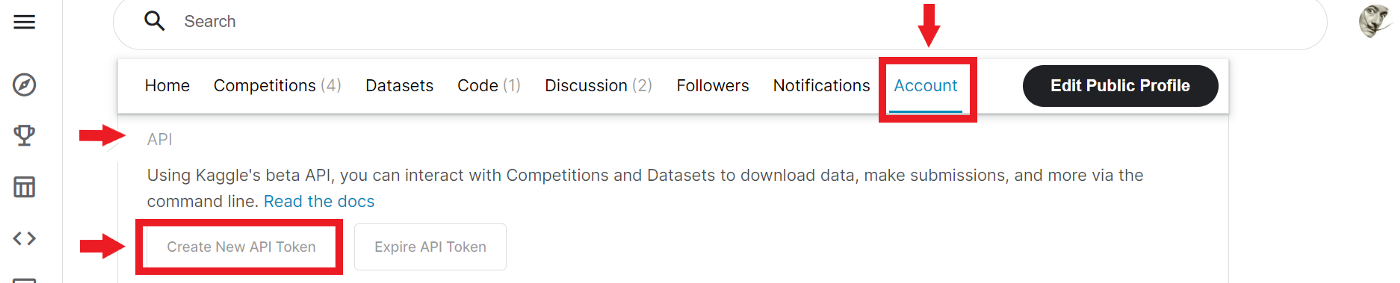

Em posse do token (baixe para seu computador), execute a células da próxima seção para acessar os dados de interesse e baixá-los.

# Baixe os dados

Instale o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json

In [10]:
!pip install -q kaggle
!rm -rf kaggle.json

from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"paulomneto","key":"e47350b8f4f6dde6dc2af4f0a491d80b"}'}

Crie a pasta .kaggle

In [11]:
    !mkdir -p ~/.kaggle
    !mv kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json


Baixe o dataset

In [12]:
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
License(s): CC0-1.0
 92% 173M/187M [00:00<00:00, 154MB/s]
100% 187M/187M [00:01<00:00, 176MB/s]


## Criar o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [13]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()


df = pd.read_csv("news-of-the-site-folhauol.zip")

# Atualizar o SPACY e  instalar os modelos pt_core_news_lg

In [14]:
# Escreva seu código aqui
# ...

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

!python -m spacy download pt_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 692.6 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Instalar os datasets `stopwords`, `punkt` e `rslp` do nltk

In [15]:
import nltk

# Escreva seu código aqui
nltk.download(['stopwords','punkt','rslp'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

## Carregar os módulos usados ao longo desse notebook

In [16]:
!pip install pyldavis &> /dev/null

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from typing import List, Set, Any


SEED = 42

# Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de **2016** e da categoria **mercado**.

In [17]:
df['date'] = pd.to_datetime(df.date)

# Create a dataframe named news_2016
news_2016 = df.loc[(df.date.dt.year == 2016) & (df.category == 'mercado')]

In [18]:
news_2016.shape

(7943, 6)

## NLTK Tokenizer and Stemmer

Crie uma coluna no dataframe `news_2016` contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem).
Para tal, complete o conteúdo da função `tokenize`.

In [19]:
from nltk.tokenize import word_tokenize
import re

stopwords = nltk.corpus.stopwords.words('portuguese')
stemmer = nltk.RSLPStemmer()

def tokenize(text: str) -> List:
  """
  Function for tokenizing using `nltk.tokenize.word_tokenize`

  Returns:
    - A list of stemmed tokens (`nltk.stem.RSLPStemmer`)
    IMPORTANT: Only tokens with alphabetic
               characters will be returned.
  """

  text = text.lower()
  text = re.sub(r'[^a-z\s]', '', text)
  tokens = word_tokenize(text)
  custom_stopwords = set(stopwords)
  cleaned_tokens = [token for token in tokens if token not in custom_stopwords]
  cleaned_tokens = [token for token in cleaned_tokens if len(token) > 2]
  return ' '.join([stemmer.stem(token) for token in cleaned_tokens])

  #escreva seu código aqui
  #return

news_2016.loc[:, 'nltk_tokens'] = news_2016.text.progress_map(tokenize)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [20]:
news_2016.head()

,title,text,date,category,subcategory,link,nltk_tokens
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,apen mulh fazend diz christin cond modst mil m...
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,cont celul pspag control fic car part decis st...
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,mai part projet ajust cont pblic aprov tr est ...
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,desd prim dc scul diz not per sinfon brot pens...
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,cifr letr selec seman lan rea negci econom con...


## Criar uma documento SPACY para cada texto do dataset

Crie uma coluna `spacy_doc` que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos `pt_core_news_lg` e aplique em todos os textos (pode demorar alguns minutos...)

In [21]:
# Escreva seu código aqui
nlp = spacy.load("pt_core_news_lg")
news_2016.loc[:, 'spacy_doc'] =  news_2016['text'].apply(nlp)

In [22]:
# Exibe o texto completo processado pelo SpaCy (como objeto Doc)
print("Texto SpaCyficado:")
print(news_2016['spacy_doc'].iloc[0])
print()

# Lista as entidades nomeadas detectadas no texto (pessoas, locais, datas, etc.)
print("Entidades nomeadas encontradas:")
for ent in news_2016['spacy_doc'].iloc[0].ents:
    print(f"- {ent.text} ({ent.label_})")
print()

# Exibe o lema (forma canônica) da primeira palavra do texto
print("Lema da primeira palavra:")
print(news_2016['spacy_doc'].iloc[0][:15].lemma_)


Texto SpaCyficado:
"Sou apenas a mulher de um fazendeiro", diz Christine Conder, com modéstia. Mas para 2,3 mil moradores de uma comunidade rural de Lancashire, no noroeste da Inglaterra, ela é uma pioneira da internet.  Em 2009, Conder deu uma solução caseira para o problema de falta de banda larga o vilarejo. E a solução evoluiu a ponto de a iniciativa se transformar em uma provedora de internet, a B4RN (Banda Larga para o Norte Rural, da singla em inglês, em tradução livre).  O provedor oferece velocidades de 1 gigabite (1 Gbps) para as comunidades do Lune Valley.  Com isso, a velocidade da banda larga local é 35 vezes maior do que a média na Grã-Bretanha, que é de cerca de 28,9 Mbps, segundo dados da Ofcom, o órgão fiscalizador das comunicações no Reino Unido.  Tudo começou quando as árvores que separavam a fazenda de Conder de uma antena de Wi-Fi —na época a única conexão com a web, fornecida pela Universidade Lancaster— ficaram altas demais.  Com a conexão prejudicada e sem outro

## Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens
lematizados para cada texto do nosso dataset. Para tal, iremos retirar as
stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista `o", "em", "em o", "em a" e "ano"`.

Crie uma coluna chamada `spacy_lemma` para armazenar o resultado desse pré-processamento.

In [23]:
def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))



def filter(w: spacy.lang.pt.Portuguese) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    # Escreva seu código aqui
    stop = list(stopwords())
    lista_stopwords = ["o", "em", "em o", "em a", "ano"]
    sw = set(stop + lista_stopwords)
    word =  w if (not w in sw and len(w) > 2) else None

    return word



def lemma(doc: spacy.lang.pt.Portuguese) -> List[str]:
    """
    Apply spacy lemmatization on the tokens of a text

    Returns:
       - a list representing the standardized (with lemmatisation) vocabulary
    """
    # Escreva seu cógigo aqui
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    tokens = [filter(token.lower()) for token in tokens if filter(token.lower()) != None]
    return tokens

news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Reconhecimento de entidades nomeadas

Crie uma coluna `spacy_ner` que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

In [24]:
def NER(doc: spacy.lang.pt.Portuguese):
  """
  Return the list of organizations for a SPACY document
  """
  # Escreva seu código aqui
  ner = [ent.text for ent in doc.ents if ent.label_ == 'ORG']
  return ner

news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [25]:
news_2016.head(1)

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,apen mulh fazend diz christin cond modst mil m...,"("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, christine, conder, modést...","[Gbps, Ofcom, Cavamos, Membro da, Ordem do Imp..."


In [26]:
news_2016.iloc[0,9]

['Gbps',
 'Ofcom',
 'Cavamos',
 'Membro da',
 'Ordem do Império Britânico',
 'Departamento de Meio Ambiente,',
 'BT',
 'Virgin']

## Bag-of-Words

Crie uma coluna `tfidf` no dataframe `news_2016`. Use a coluna `spacy_lemma` como base para cálculo do TFIDF.
O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (`min_df`) nos documentos.

In [27]:
#from sklearn.feature_extraction.text import CountVectorizer teste


class Vectorizer:
  def __init__(self, doc_tokens: List):
    self.doc_tokens = doc_tokens
    self.tfidf = None
    self.model = None

  def vectorizer(self):
      """
      Convert a list of tokens to tfidf vector
      Returns the tfidf vector and attribute it to self.tfidf
      """
      # Escreva seu código aqui
      vectorizer = TfidfVectorizer(max_features=5000, min_df=3)
      self.tfidf = vectorizer.fit_transform(self.doc_tokens)
      self.model = vectorizer

  def __call__(self):
    if self.tfidf is None:
        self.vectorizer()
    return self.tfidf

doc_tokens = [' '.join(token) for token in news_2016.spacy_lemma.values.tolist()]
vectorizer = Vectorizer(doc_tokens)

def tokens2tfidf(tokens):
    vectorizer()
    tokens = ' '.join(tokens)
    array = vectorizer.model.transform([tokens]).toarray()[0]
    return array


news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [28]:
news_2016.head()

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner,tfidf
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,apen mulh fazend diz christin cond modst mil m...,"("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, christine, conder, modést...","[Gbps, Ofcom, Cavamos, Membro da, Ordem do Imp...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,cont celul pspag control fic car part decis st...,"(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã...","[Oi, TIM, Claro, Vivo, Secretaria de Estado da...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,mai part projet ajust cont pblic aprov tr est ...,"(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau...","[Executivo dos três Estados, Executivo, Assemb...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,desd prim dc scul diz not per sinfon brot pens...,"(Desde, as, primeiras, décadas, do, século, 19...","[década, século, nota, ópera, sinfonia, brotar...","[MIT, Instituto de Tecnologia de Massachusetts...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,cifr letr selec seman lan rea negci econom con...,"(O, Cifras, &, Letras, seleciona, semanalmente...","[cifras, letras, selecionar, semanalmente, lan...","[Singularity University, Sistema Financeiro Na...","[0.04277214371992206, 0.0, 0.0, 0.0, 0.0, 0.0,..."


## Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

In [29]:
N_TOKENS = 9

corpus = np.array(news_2016.tfidf.tolist())
#Escreva seu código aqui
lda = LDA(
    n_components=N_TOKENS,
    max_iter=100,
    random_state=SEED

)

lda.fit(corpus)

for idx,topic in enumerate(lda.components_):
    print(f"Tópico {idx+1}:")
    print(topic)
    print()

Tópico 1:
[1.98639263 0.11111128 0.11111121 ... 0.11111272 0.11121176 0.11111132]

Tópico 2:
[28.6994254   1.42747163  0.64830586 ...  3.41652155  0.57658879
  0.24612518]

Tópico 3:
[0.1111443  0.11113721 0.1111219  ... 0.11113603 0.11111125 0.11112137]

Tópico 4:
[0.11111122 0.11111136 0.11111122 ... 0.11111121 0.11111133 0.11111136]

Tópico 5:
[0.11111365 0.11111718 0.11111246 ... 0.11111243 0.11111132 0.11111362]

Tópico 6:
[0.1111123  0.11112524 0.11111123 ... 0.11111403 0.11111135 0.11111954]

Tópico 7:
[ 8.67317822  0.36463091  3.39234141 ... 15.09020362  0.41819161
  4.3537035 ]

Tópico 8:
[ 9.93207693  2.93265756  6.23616695 ... 16.24370318  1.16312411
  3.3639528 ]

Tópico 9:
[0.11113634 0.11111208 0.11114125 ... 0.11113435 0.11111126 0.1111299 ]



### Atribua a cada text, um (e apenas um) tópic.

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [30]:
#dtm = pd.DataFrame(news_2016['tfidf'].tolist(),columns=vectorizer.model.get_feature_names_out())


In [31]:
#dtm.head()

In [32]:
def get_topic(tfidf: np.array):
    """
    Get topic for a lda trained model
    """
    # Escreva seu código aqui
    topic_d = lda.transform(tfidf.reshape(1, -1))
    bt_idx = topic_d.argmax()
    return bt_idx

news_2016['topic'] = news_2016.tfidf.progress_map(get_topic)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [33]:
news_2016.topic.value_counts()

,count
topic,
7,3601
6,2686
1,1584
2,42
3,16
4,13
8,1


## Número de documentos vs tópicos

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

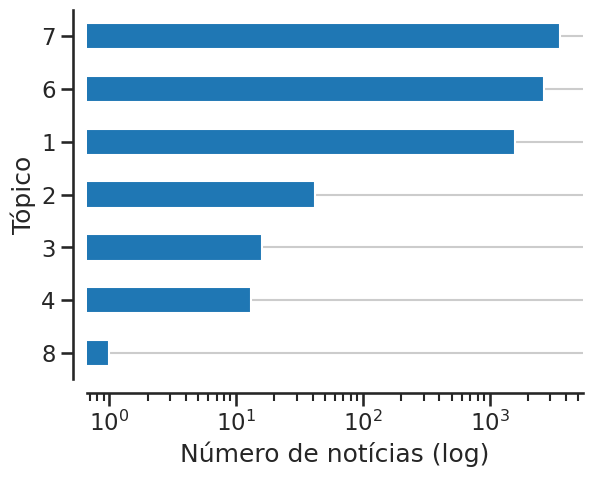

In [34]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

In [35]:
news_2016['spacy_ner']

,spacy_ner
34207,"[Gbps, Ofcom, Cavamos, Membro da, Ordem do Imp..."
34238,"[Oi, TIM, Claro, Vivo, Secretaria de Estado da..."
34245,"[Executivo dos três Estados, Executivo, Assemb..."
34248,"[MIT, Instituto de Tecnologia de Massachusetts..."
34249,"[Singularity University, Sistema Financeiro Na..."
...,...
94280,"[Santander, FGV, Ibre]"
94295,"[Nielsen, Nielsen, MAS NÃO QUEBRAM -, Nielsen,..."
94301,"[Jovens, LCA, LCA]"
94310,"[LCA Consultores, GO Associados, PROCURA, Pnad..."


In [36]:
sw = stopwords()
sw_add = ['arena','mariana','ficha','país','idade','ano','afirmar','barril','empresa','governo','mercado','brasil','pessoa','caso'] + list(news_2016['topic'].unique())
sw = sw.union(sw_add)
print(sw)

{'apontar', 'lhe', np.int64(1), np.int64(2), np.int64(3), 'pontos', np.int64(7), 'querem', np.int64(6), np.int64(8), np.int64(4), 'não', 'meu', 'grande', 'quero', 'deste', 'acerca', 'seja', 'seremos', 'fazer', 'estivessem', 'final', 'seria', 'certamente', 'serão', 'obrigada', 'desse', 'cá', 'meus', 'suas', 'terão', 'pois', 'estás', 'primeira', 'vais', 'deles', 'tarde', 'podem', 'número', 'números', 'apenas', 'além', 'esteve', 'pegar', 'tanta', 'houvermos', 'iniciar', 'vindo', 'quê', 'for', 'sétima', 'estivestes', 'grupo', 'também', 'tentaram', 'das', 'nesse', 'nossas', 'mariana', 'ao', 'tu', 'diante', 'todo', 'bastante', 'fazes', 'poder', 'lá', 'tiveste', 'houverei', 'minha', 'estivemos', 'houvessem', 'assim', 'parte', 'porém', 'ir', 'poderá', 'coisa', 'segundo', 'longe', 'ficha', 'só', 'oito', 'outra', 'estive', 'desta', 'tem', 'perto', 'dele', 'fazeis', 'usar', 'serei', 'fazemos', 'houve', 'ontem', 'nossa', 'está', 'somente', 'é', 'sua', 'seus', 'ambas', 'sou', 'corrente', 'terceira'

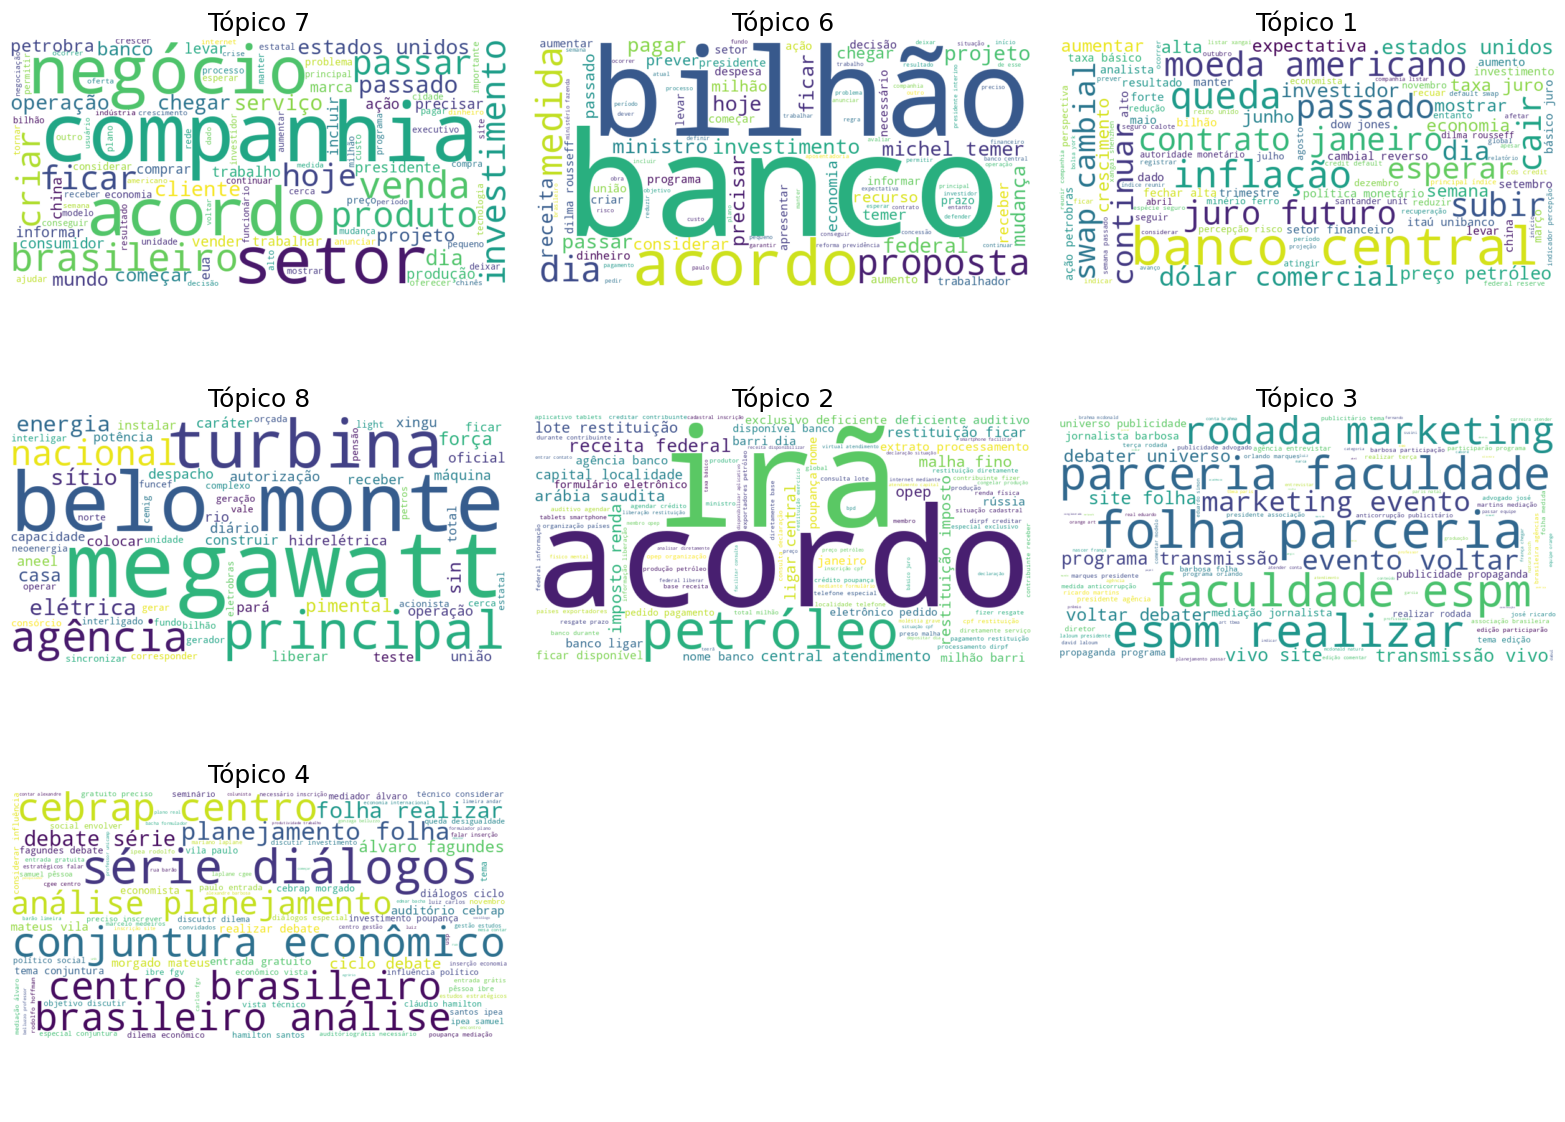

In [37]:
def plot_wordcloud(text:str, ax:plt.Axes) -> plt.Axes:
    """
    Plot the wordcloud for the text/
    Arguments:
        -  text: string to be analised
        -  ax: plt subaxis
    Returns:
     - ax
    """
    # Escreva seu código aqui
    wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=400,
    max_words=100
    ).generate(text)

    ax.imshow(wordcloud,interpolation='bilinear')
    ax.axis('off')
    return ax

def plot_wordcloud_for_a_topic(topic:str, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    list_of_words = [word for word in list_of_words if word.lower() not in sw]
    string_complete = ' '.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))


unique_topics = news_2016['topic'].unique()
eixos_utilizados = []

for idx, (topic, ax) in enumerate(zip(unique_topics, axis.flatten())):
  ax_ = plot_wordcloud_for_a_topic(topic, ax)

  if ax_ is None:
    ax.imshow(np.ones((10, 10, 3)), interpolation='nearest', cmap='gray')
    ax.axis('off')
    ax.set_title('Sem dados')
  else:
    ax.set_title(f"Tópico {topic}")

    eixos_utilizados.append(ax)


for ax in axis.flatten()[len(unique_topics):]:

    if ax not in eixos_utilizados:
        ax.imshow(np.ones((10, 10, 3)), interpolation='nearest', cmap='gray')
        ax.axis('off')



fig.tight_layout()
plt.show()


##axis_  = axis.flatten()
##for idx, ax in enumerate(axis_):
##    ax_ = plot_wordcloud_for_a_topic(idx + 1, ax)
##    if ax_ is None:
##        plt.delaxes(ax)
##        continue
##    ax.set_title(f"Tópico {idx + 1}")
##fig.tight_layout()

## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

7
6
1
8
2
3
4


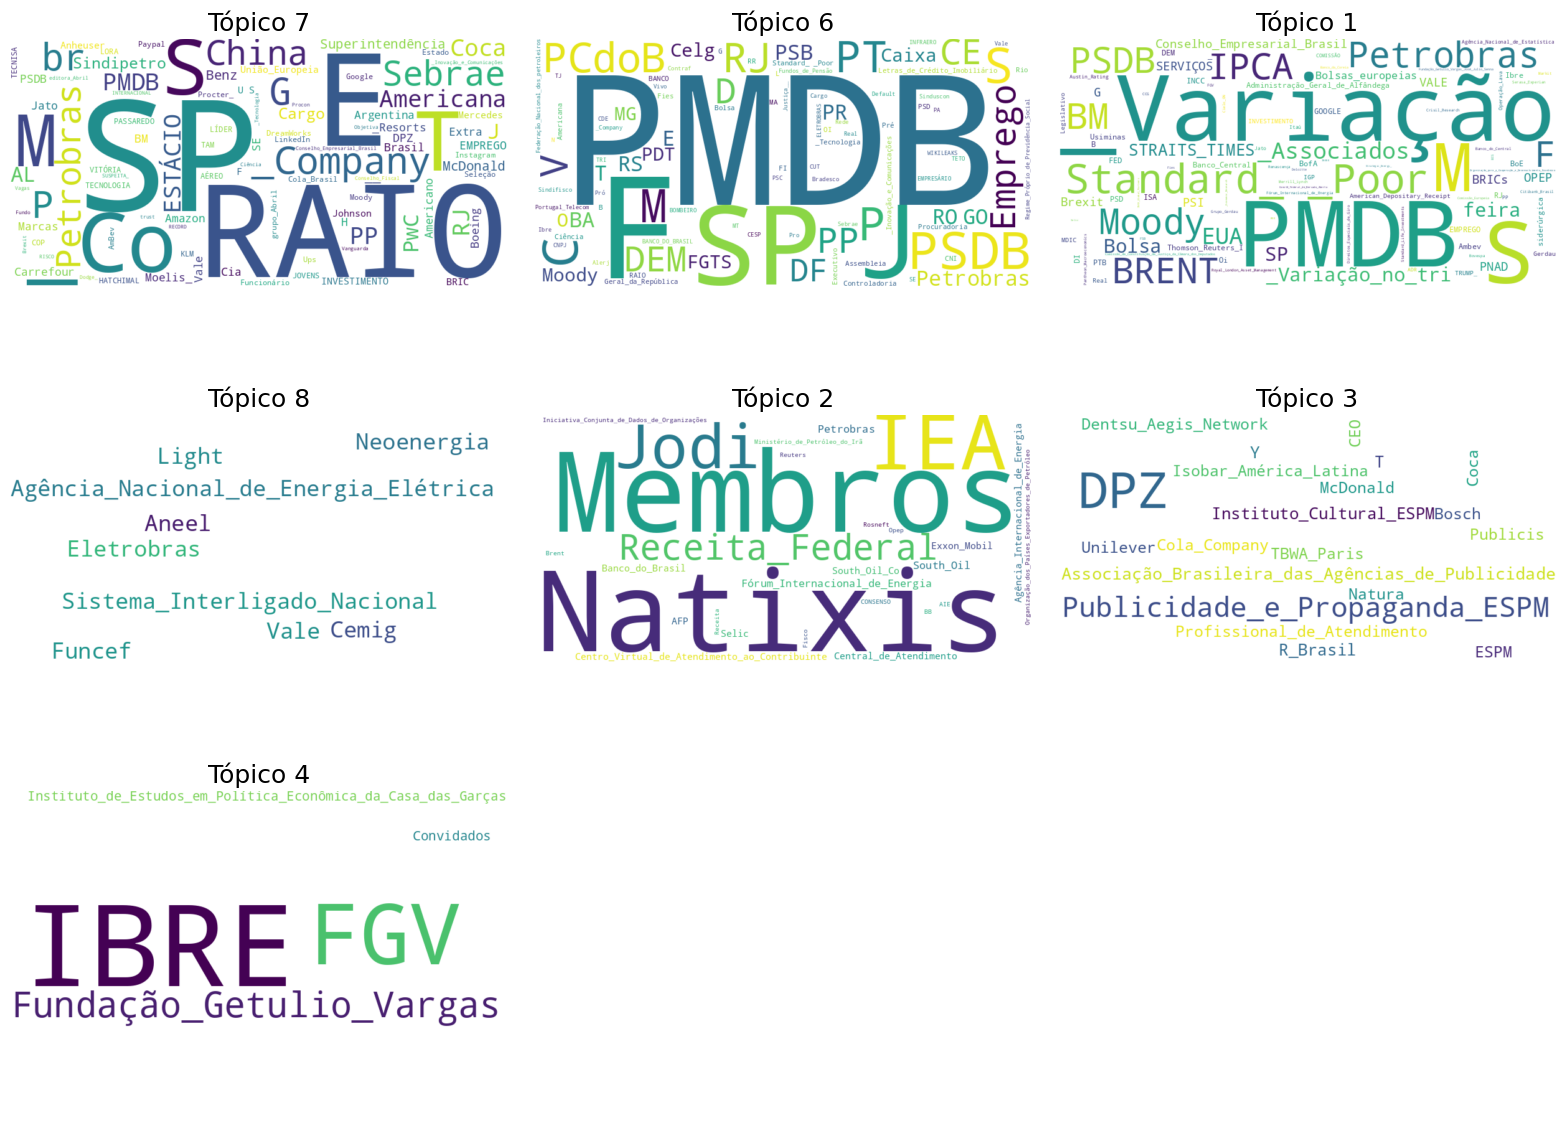

In [38]:
def plot_wordcloud_entities_for_a_topic(topic: str, ax: plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l: [w.replace(' ', '_') for w in l])
    list_of_words = chain(*list_of_docs)
    list_of_words = [word for word in list_of_words if word.lower() not in sw]
    list_of_words = set(list_of_words)

    string_complete = ' '.join(list_of_words)

    if not len(string_complete):
        return None

    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))
axes = axis.flatten()

eixos_utilizados = []

for idx, (topic, ax) in enumerate(zip(unique_topics, axes)):
    print(topic)
    ax_ = plot_wordcloud_entities_for_a_topic(topic, ax)

    if ax_ is None:
        ax.imshow(np.ones((10, 10, 3)), interpolation='nearest', cmap='gray')
        ax.axis('off')

    else:
        ax.set_title(f"Tópico {topic}")

    eixos_utilizados.append(ax)

for ax in axes:
    if ax not in eixos_utilizados:
        ax.imshow(np.ones((10, 10, 3)), interpolation='nearest', cmap='gray')
        ax.axis('off')


fig.tight_layout()
plt.show()
